# SI Figure 3

In [1]:
# import general packages
import numpy as np
import sys
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec

%matplotlib inline

# Plotting params

In [2]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 9,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1.5,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 4

# Function to load data

In [3]:
def data_dict_from_pkl(DataName):
    FolderPath = FolderPath = os.getcwd()
    DataFilePath = os.path.join(FolderPath,DataName)
    
    DataFile = open(DataFilePath, 'rb')
    Data = pickle.load(DataFile, encoding = 'latin1')
    DataFile.close()

    return Data

# Load the data

In [4]:
data_dict = data_dict_from_pkl('SI_Fig3_data.pkl')

# Define a function to generate the plotlabels used in the plot

In [5]:
def general_msmt_label_gen(N_spectator_init, N_spectator_RO):

    str_init = 'Init: '
    for i in range(N_spectator_init+1):
        if i == 0:
            str_init_add = 'm, '
        else: 
            str_init_add = 's' + str(i) + ', '
        str_init = str_init + str_init_add
    str_init = str_init[:-2]

    str_RO = '. RO: '
    for j in range(N_spectator_RO+1):
        i = N_spectator_RO - j
        if i == 0:
            str_RO_add = 'm, '
        else:
            str_RO_add = 's' + str(i) + ', '
        str_RO = str_RO + str_RO_add
    str_RO = str_RO[:-2]

    label = str_init + str_RO

    return label

# Generate the plot from the data

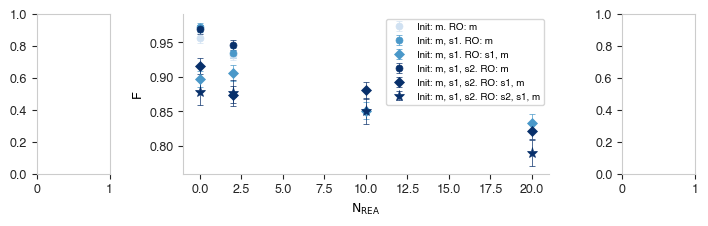

In [6]:
# Define the figure, gridspec and sub-gridspec. From these gridspecs, define the plot axes.
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54/1.5*fig_multiplier]) # ,constrained_layout=True)

gs = GridSpec(1, 5, figure=fig)#, hspace = 0.1, wspace = 0.1)
ax = fig.add_subplot(gs[0,1:4])
ax_dummy1 = fig.add_subplot(gs[0,0])
ax_dummy2 = fig.add_subplot(gs[0,4])


N_spectators = data_dict['N_spectators']

y_lim_max = 0

color_list_figSI2 = cm.Blues(np.linspace(0.2,1,N_spectators+1))
color_init_dict = {}
for i in range(N_spectators+1):
    color_init_dict[i] = color_list_figSI2[i]
marker_RO_dict = {0: 'o', 1: 'D', 2: '*'}

scheme = 'msmt'
for N_spectator_init in list(np.arange(N_spectators+1)): 
    for N_spectator_RO in list(np.arange(N_spectator_init+1)): 

        x = np.array(data_dict['experiment'][scheme][N_spectator_init][N_spectator_RO]['x'])
        y = np.array(data_dict['experiment'][scheme][N_spectator_init][N_spectator_RO]['y'])
        y = 1./2 + 1./2*y
        yerr = np.array(data_dict['experiment'][scheme][N_spectator_init][N_spectator_RO]['yerr'])
        yerr = 1./2*yerr
        y_norm = np.array(data_dict['experiment'][scheme][N_spectator_init][N_spectator_RO]['y_norm'])
        yerr_norm = np.array(data_dict['experiment'][scheme][N_spectator_init][N_spectator_RO]['yerr_norm'])
        C_RO_str = data_dict['experiment'][scheme][N_spectator_init][N_spectator_RO]['C_RO_str']
        

        label = general_msmt_label_gen(N_spectator_init, N_spectator_RO)
        color = color_init_dict[N_spectator_init]
        marker = marker_RO_dict[N_spectator_RO]
        markersize = 5*fig_multiplier if marker != '*' else 8*fig_multiplier
        ax.errorbar(x,y,yerr, color = color, marker = marker, linestyle = '', label = label, \
                    markersize = markersize, elinewidth = 0.5*fig_multiplier, capsize = 2.5*fig_multiplier, markeredgewidth = 0.5*fig_multiplier)

        y_lim_max = np.max(y) if np.max(y) > y_lim_max else y_lim_max
        

carbon_list = data_dict['carbon_list']
plot_title = 'Data and '+str(N_spectators)+' spectator(s): ' + ''.join(['C'+str(C)+', ' for C in carbon_list[:N_spectators+1]])[:-2]+'.' 
ax.set_ylabel(r'F')
ax.set_xlabel(r'$\mathrm{N_{REA}}$')
ax.set_ylim([0.75,1.05*y_lim_max])
ax.set_xlim([-3,np.max(x)+3])
# ax.axvline(x=0, color = 'k', linestyle = '--', alpha = 0.3)
ax.legend(fontsize = 7, loc = 'upper right')

ax.set_xlim([-1,21])
ax.set_ylim([0.76,1.02*y_lim_max])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




plt.tight_layout()

# FolderPath = r'' 
# FigName = 'SI_Fig3.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)
